In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


Importing Dataset

In [2]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking if any null values present in Raw Dataset

In [5]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

Checking count of null values if present in Raw Dataset

In [6]:
dataset.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Visualization using seaborn and matplotlib.pylot

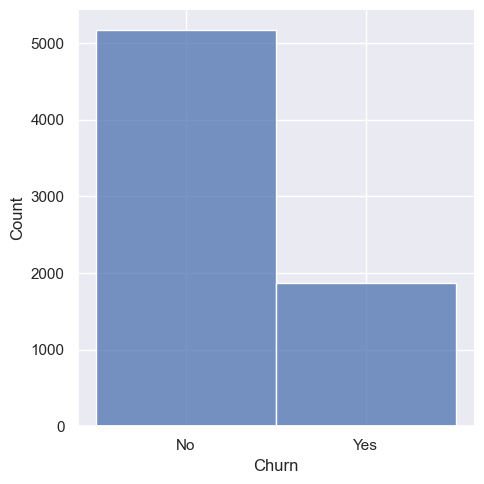

In [7]:
sns.set()
sns.displot(dataset['Churn'])
plt.show()

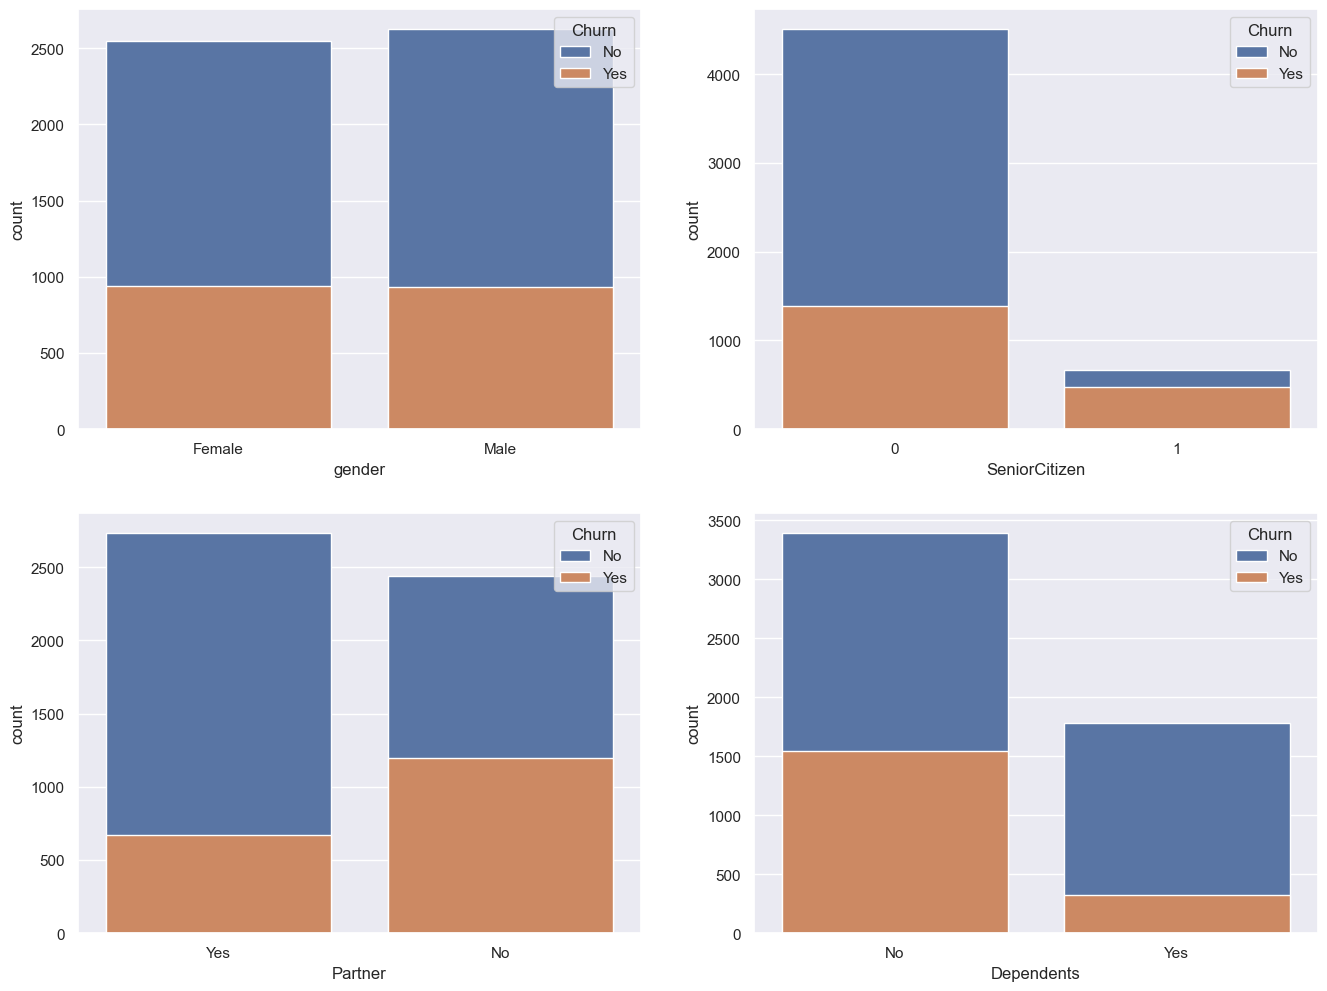

In [8]:
personal_info = ['gender','SeniorCitizen','Partner','Dependents']

fig, axis = plt.subplots(2, 2, figsize=(16,12))
for index,feature in enumerate(personal_info):
    plt.subplot(2,2,index+1)
    axis=sns.countplot(x=feature, hue='Churn',data=dataset,dodge=False)
    plt.xlabel(feature)

plt.show()


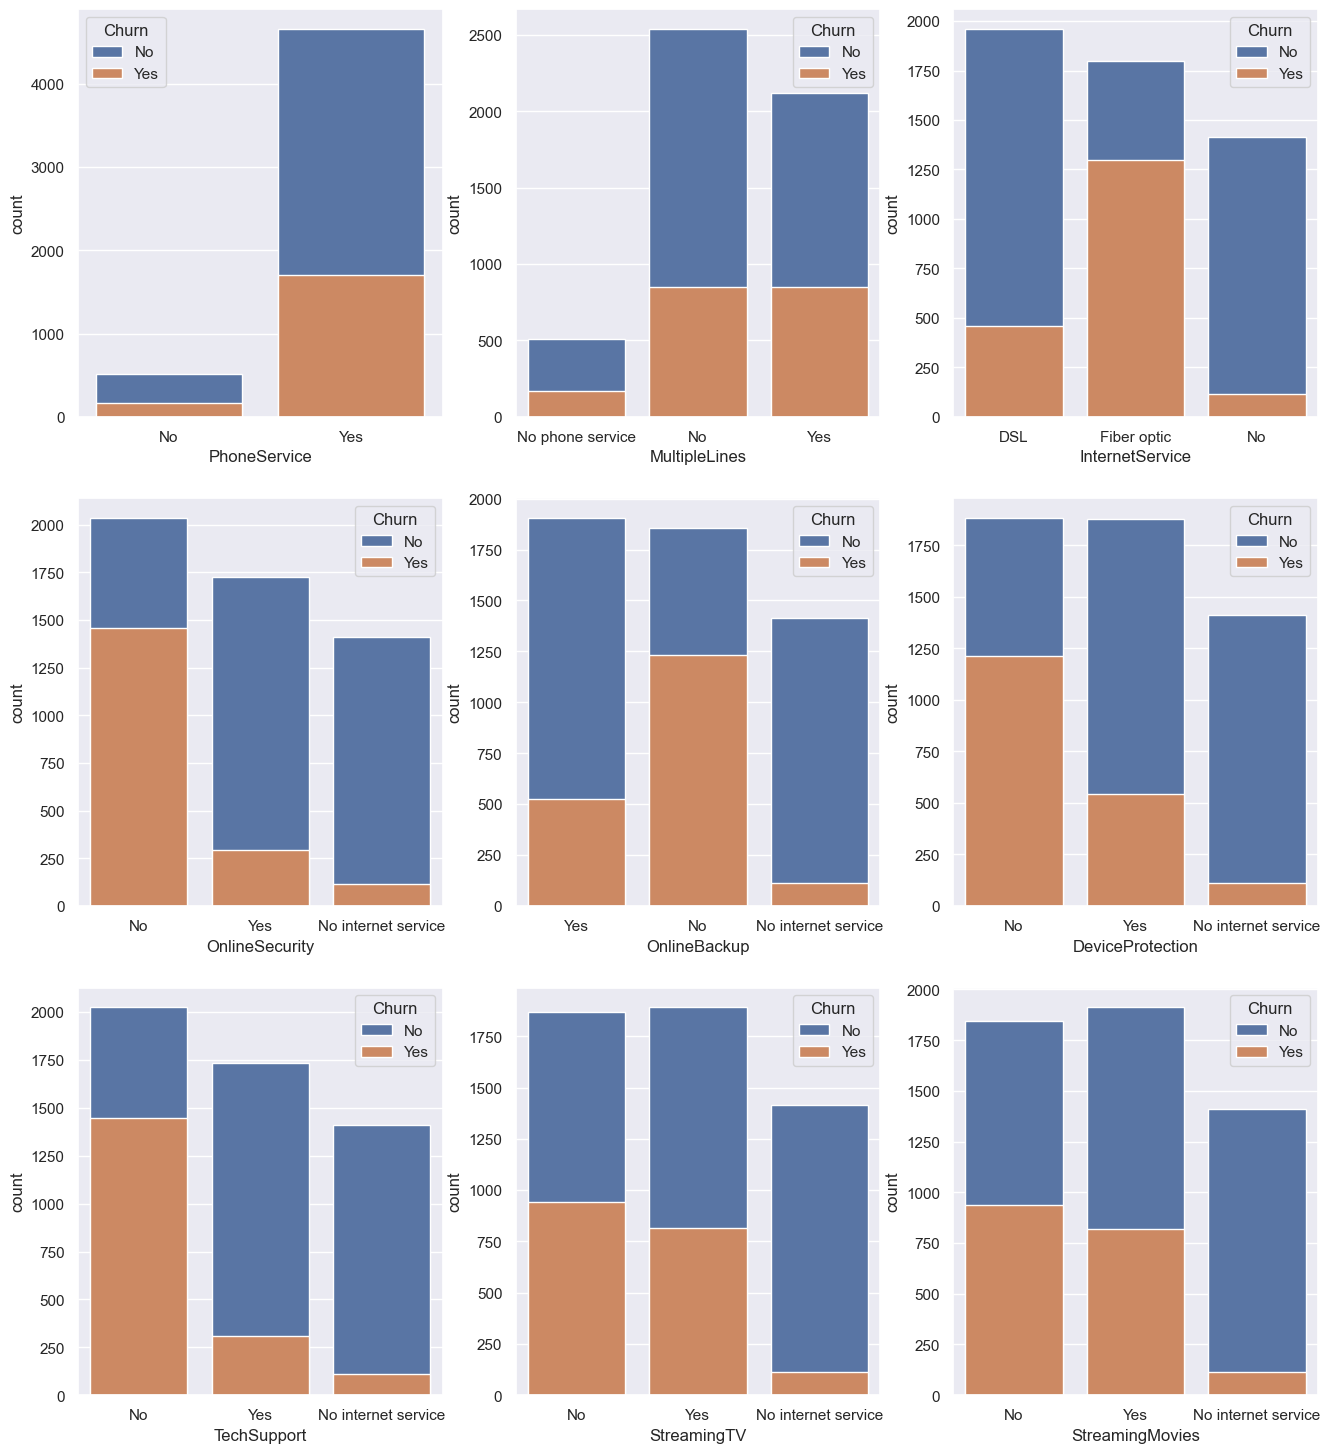

In [9]:
business_info = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axis = plt.subplots(3, 3, figsize=(16,18))
for i, feature in enumerate(business_info):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=feature, hue='Churn', data=dataset, dodge=False)
    plt.xlabel(feature)
    
plt.show()

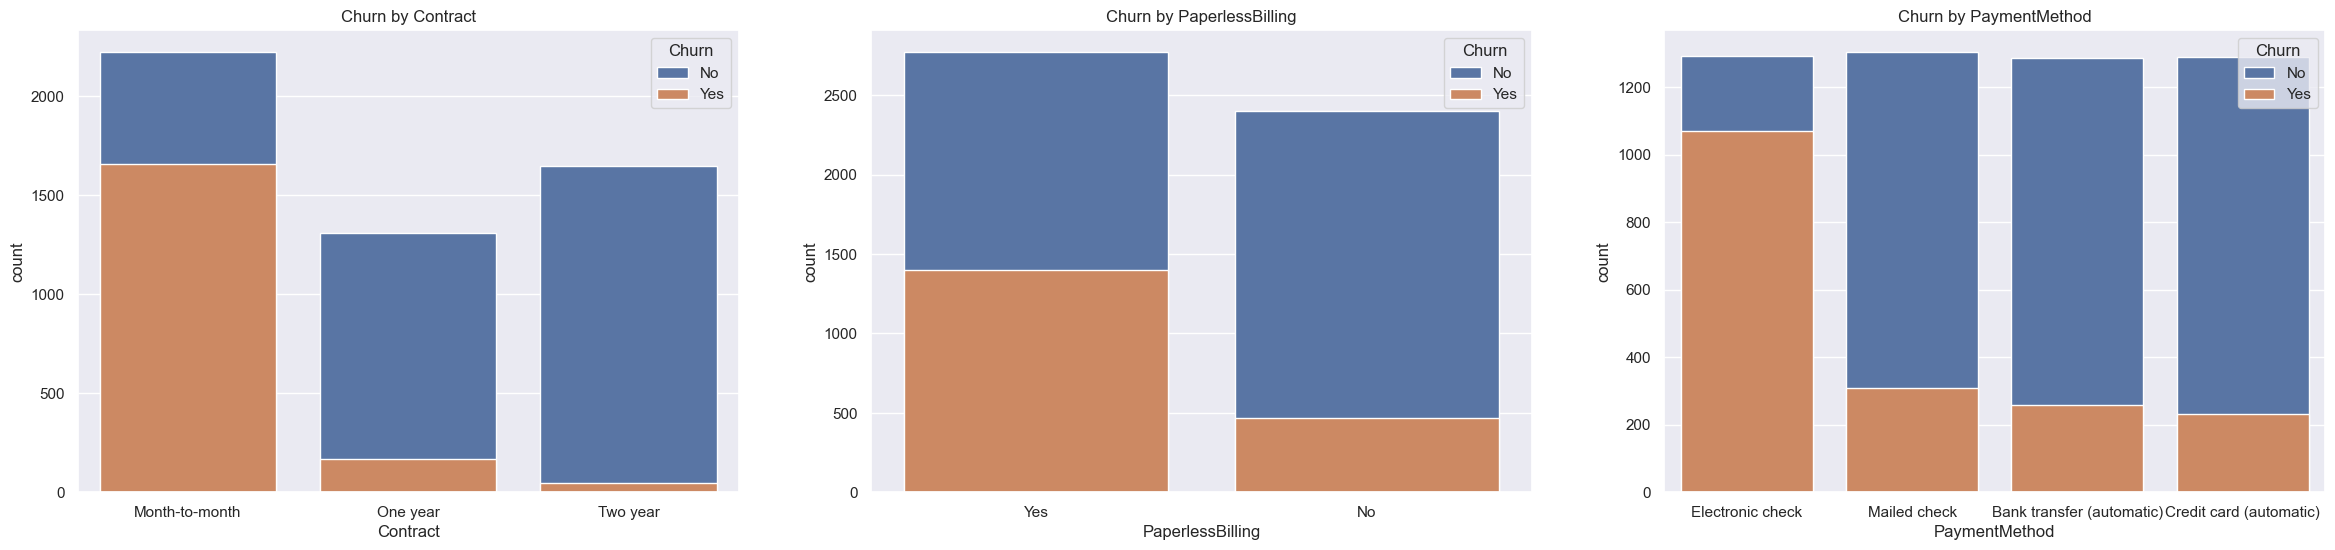

In [10]:
account_info = ['Contract', 'PaperlessBilling', 'PaymentMethod']
fig, axis = plt.subplots(1,3, figsize=(29,6))
for i, feature in enumerate(account_info):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=feature, hue='Churn', data=dataset, dodge=False)
    plt.xlabel(feature)
    plt.title('Churn by '+feature)
    
plt.show()

Data Preprocessing

In [11]:
labelencoder = LabelEncoder()
dataset['customerID'] = labelencoder.fit_transform(dataset['customerID'])
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
def dataset_preprocessing(dataset):
    raw_data = dataset
    for column in raw_data.columns:
        datatype = type(raw_data.loc[0,column]).__name__
        if(datatype=='str'):
            for index in range(len(raw_data.loc[:,column])):
                raw_data.loc[index,column]=raw_data.loc[index,column].lower()
            if('no' in list(raw_data.loc[:,column]) or 'yes' in list(raw_data.loc[:,column])):
                raw_data[column]=labelencoder.fit_transform(raw_data[column])
            else:
                raw_data[column]=labelencoder.fit_transform(raw_data[column])
    return raw_data

processed_dataset = dataset_preprocessing(dataset)
processed_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [13]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)

In [14]:
def get_metrices(model_estimator, name, x_train, x_test, y_train,y_test):
        result = pd.DataFrame({'Train Accuracy':accuracy_score(model_estimator.predict(x_train),y_train),
                               'Test Accuracy':accuracy_score(model_estimator.predict(x_test),y_test),
                               'Test Precision':precision_score(model_estimator.predict(x_test),y_test),
                               'Test Recall':recall_score(model_estimator.predict(x_test),y_test),
                               'Test F1-Score':f1_score(model_estimator.predict(x_test),y_test)},index=[name])
        return result

In [15]:
lg_classifier = LogisticRegression(max_iter=1000).fit(x_train,y_train)
dt_classifier = DecisionTreeClassifier().fit(x_train,y_train)
nb_classifier = GaussianNB().fit(x_train,y_train)

In [16]:
metrices_comparisons = pd.concat([get_metrices(lg_classifier,"Logistic Regression",x_train,x_test,y_train,y_test),
                                  get_metrices(dt_classifier,"Decision Tree",x_train,x_test,y_train,y_test),
                                  get_metrices(nb_classifier,"Naive Bayes",x_train,x_test,y_train,y_test)])
metrices_comparisons

,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-Score
Logistic Regression,0.803294,0.779103,0.485656,0.632000,0.549247
Decision Tree,1.000000,0.729699,0.463115,0.513636,0.487069
Naive Bayes,0.758425,0.746167,0.686475,0.532591,0.599821


In [17]:
def get_confusion_matrix(name,y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,cmap="Reds",fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix: "+name)
    plt.show()

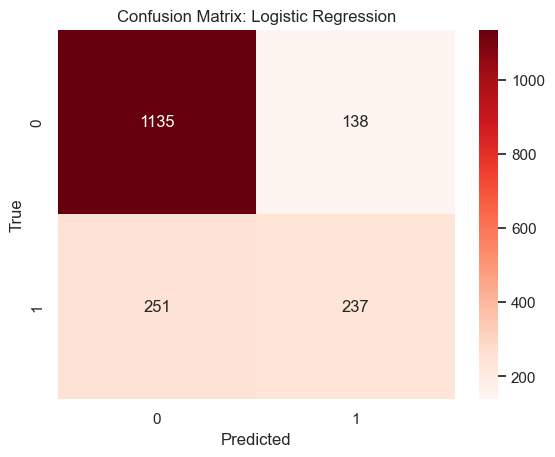

In [18]:
y_pred_lg = lg_classifier.predict(x_test)
get_confusion_matrix("Logistic Regression",y_test,y_pred_lg)

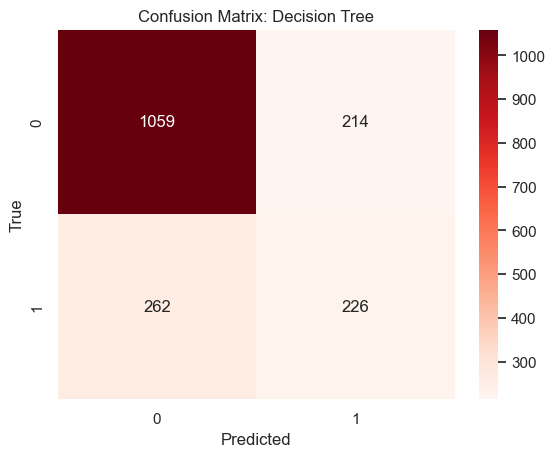

In [19]:
y_pred_dt = dt_classifier.predict(x_test)
get_confusion_matrix("Decision Tree",y_test,y_pred_dt)

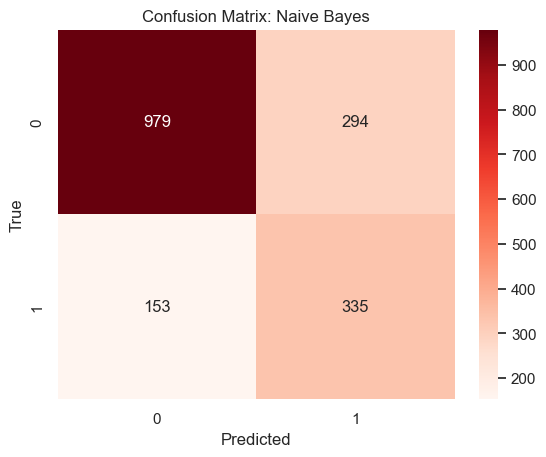

In [20]:
y_pred_nb = nb_classifier.predict(x_test)
get_confusion_matrix("Naive Bayes",y_test,y_pred_nb)

In [21]:
x_s = [[6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925 ]]

In [22]:
pred = lg_classifier.predict(x_s)
if(lg_classifier.predict(x_s)[0]):
    print("Churn: Yes")
else:
    print("Churn: No")

Churn: Yes


In [23]:
pred = dt_classifier.predict(x_s)
if(dt_classifier.predict(x_s)[0]):
    print("Churn: Yes")
else:
    print("Churn: No")

Churn: Yes


In [24]:
pred = nb_classifier.predict(x_s)
if(nb_classifier.predict(x_s)[0]):
    print("Churn: Yes")
else:
    print("Churn: No")

Churn: Yes
